In [1]:
import numpy as np
import scipy.signal as sig

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
# plt.style.use("seaborn")


### Computing the DFT [Discrete Fourier Transform]
Let's define a function, sin(x) from $-2\pi n$ to $2\pi n$. We should see two peaks after computing the DFT

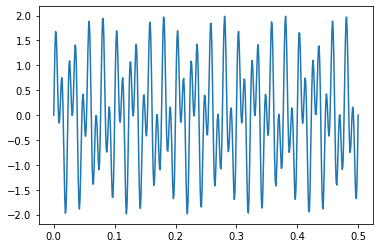

In [2]:
n = 10
#define t(s) as a sum of two sine functions
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + np.sin(90 * 2 * np.pi * t)

#display the input t(s)
plt.plot(t, s)
plt.show()

then compute the DFT using numpy.fft:

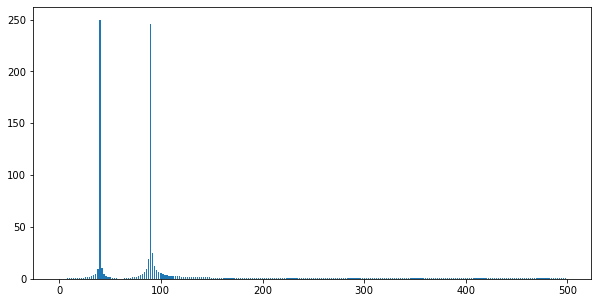

In [3]:

interval = t[1] - t[0]
N = t.size

fft = np.fft.fft(s)

f = np.linspace(0, 1/interval, N)

#make the freq plot
fft1d = plt.figure(figsize=(10, 5))
fft1d_fig = fft1d.add_subplot(111)
fft1d_fig.bar(f[:N//2], np.abs(fft)[:N//2], width=1.2)
plt.show()

### Let's try a 2d transform!
using a sinusoidal (cos) transmission function. We should expect three peaks on our FFT.

Text(0.5, 1.0, 'Diffraction Pattern')

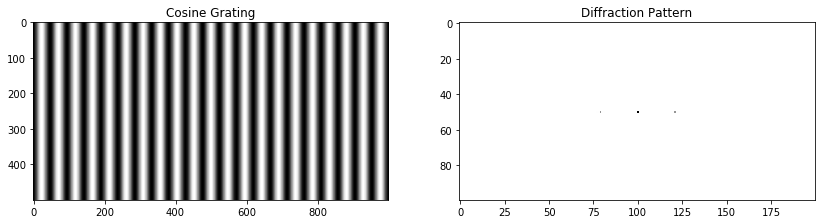

In [4]:
#generate some the grating's transmission function in 1d
x = np.linspace(-1,1, 1000)
y = 0.5+0.5*np.cos(10.5*2*np.pi*x)

#repeat the slice for the height of the grating
t2 = np.array( [y for i in range(len(y)//2)] )

#compute the FFT
f2 = np.fft.fft2(t2)
f2 = np.fft.fftshift(f2)
f2 = np.abs(f2)

#zoom in  a bit to make the output visible - the three points are insanely small as they are dirac delta functions.
f2 = f2[200:300, 400:600]

#plot the input and result
t2_plot, t2_fig = plt.subplots(1,2, figsize=[14,4])
t2_fig[0].imshow(t2, cmap="gray")
t2_fig[0].set_title("Cosine Grating")
t2_fig[1].imshow(f2, cmap="Greys")
t2_fig[1].set_title("Diffraction Pattern")


### Now, lets do a square grating.

Here, we're expecting an infinite series of peaks, with alternating sign and decreasing magnitude as m->infinity

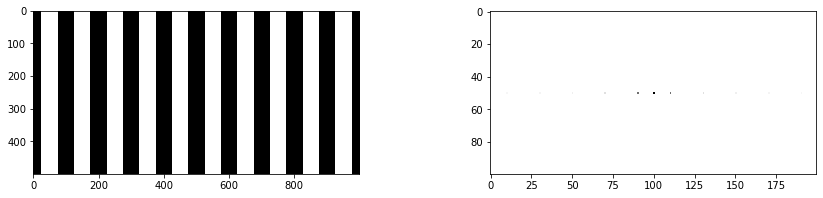

In [5]:
#change the period to see how it changes the output
PERIOD = 0.1

x = np.linspace(-1,1, 1000)

def squarewave(x, period):
    y = x/period
    y = np.round(y)
    return y % 2

sqwave = np.array([ squarewave(x, PERIOD) for i in range(len(x)//2) ])

f3 = np.fft.fft2(sqwave)
f3 = np.fft.fftshift(f3)
f3 = np.abs(f3)


center_axis = f3[250][400:600]


f3 = f3[200:300, 400:600]
f3_plot, f3_fig = plt.subplots(1,2,figsize = (15,3))
f3_fig[0].imshow(sqwave, cmap = 'gray')
f3_fig[1].imshow(f3, cmap="Greys")




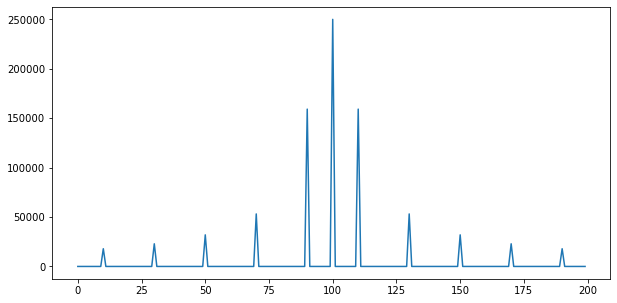

In [6]:
#for clarity, lets just take the center of the output and plot it in 1d. Note that this is after taking the magnitude
# (absolute value) of the FFT output. Taking the real component, we would see every other peak having a negative signal.
f3_cplot, f3_cfig = plt.subplots(figsize = (10,5))
f3_cfig.plot(center_axis)

### What about a square/rectangular aperture?

Text(0.5, 1.0, 'Diffraction Pattern')

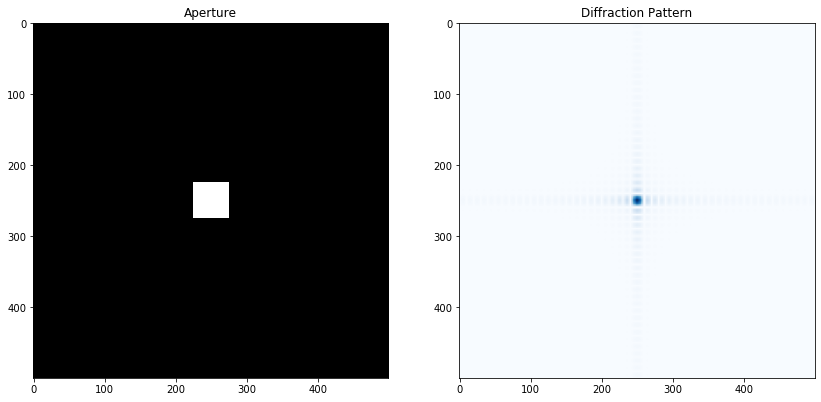

In [7]:
#define the aperture transmission function. change the width variable to change the dimensions:
sq_ap = np.zeros((500, 500))

#set one value to 500 for "infinite" slit 
WIDTH = 50
HEIGHT = 50
bounds = {"left": 250-WIDTH//2, "right": 250+WIDTH//2, "top": 250-HEIGHT//2, "bottom": 250+HEIGHT//2 }
sq_ap[bounds["top"]:bounds["bottom"], bounds["left"]:bounds["right"]] = 1

#compute the FFT
f4 = np.fft.fft2(sq_ap)
f4 = np.fft.fftshift(f4)
f4 = np.abs(f4)

#plot the aperture and diffraction pattern
f4_plt, f4_fig = plt.subplots(1,2, figsize=(14,7))
f4_fig[0].imshow(sq_ap, cmap="gray")
f4_fig[0].set_title("Aperture")
f4_fig[1].imshow(f4, cmap="Blues")
f4_fig[1].set_title("Diffraction Pattern")